![logo-gt.png](attachment:logo-gt.png)

<div class="alert alert-block alert-info">
    <h1>BIOS 4150/BIOL 6150</h1>
    <h3>Instructor: Dr. King Jordan</h3>
    <p>Shivam Sharma (shivamsharma13@gatech.edu), Nilavrah Sensarma (nsensarma3@gatech.edu), Bengy Gyimah-Asamoah, (bgyimaha3@gatech.edu)

</p>
</div>

<div class="alert alert-block alert-warning">
    <h2>Project 10 Genetic ancrestry inference</h2>
    <h3>Deadline: 11:59PM, December 4th, 2024</h3>
</div>

---

# **1. Ancestry inference**
### *Total Questions: 4*
### *Total Points: 25+25+25+25=100*


---

<div class="alert alert-block alert-warning">
    <p>1.1 Using the tool Admixture, infer ancestry for all individuals in your 1000 genomes data</p>
    <p>1.2 Read the online manual, perform appropriate QC and get the optimal number of K.</p>
    <p>1.3 Report final ancestries using a visualization method of your choice.</p>
    <p>1.4 Report average ancestry values for each of the 26 population groups</p>
</div>

In [ ]:
#Show commands and results here.

In [1]:
!admixture --help

****                   ADMIXTURE Version 1.3.0                  ****
****                    Copyright 2008-2015                     ****
****           David Alexander, Suyash Shringarpure,            ****
****                John  Novembre, Ken Lange                   ****
****                                                            ****
****                 Please cite our paper!                     ****
****   Information at www.genetics.ucla.edu/software/admixture  ****

                                                                              
  ADMIXTURE basic usage:  (see manual for complete reference)                 
    % admixture [options] inputFile K                                         
                                                                              
  where:                                                                      
    K is the number of populations; and                                       
    inputFile may be:                     

# 1.1

In [ ]:
# copying the files from project 9 to folder 10

In [1]:
!cp ~/biol6150/ProjectSubmissions/Group8/Project9/scratch/1000Genomes.Phase3.Chr2.QCFinal.bed ~/biol6150/ProjectSubmissions/Group8/Project10/
!cp ~/biol6150/ProjectSubmissions/Group8/Project9/scratch/1000Genomes.Phase3.Chr2.QCFinal.bim ~/biol6150/ProjectSubmissions/Group8/Project10/
!cp ~/biol6150/ProjectSubmissions/Group8/Project9/scratch/1000Genomes.Phase3.Chr2.QCFinal.fam ~/biol6150/ProjectSubmissions/Group8/Project10/

****                   ADMIXTURE Version 1.3.0                  ****
****                    Copyright 2008-2015                     ****
****           David Alexander, Suyash Shringarpure,            ****
****                John  Novembre, Ken Lange                   ****
****                                                            ****
****                 Please cite our paper!                     ****
****   Information at www.genetics.ucla.edu/software/admixture  ****

Random seed: 43
Point estimation method: Block relaxation algorithm
Convergence acceleration algorithm: QuasiNewton, 3 secant conditions
Point estimation will terminate when objective function delta < 0.0001
Estimation of standard errors disabled; will compute point estimates only.
Size of G: 2504x17106
Performing five EM steps to prime main algorithm
1 (EM) 	Elapsed: 3.562	Loglikelihood: -5.26637e+07	(delta): 1.39359e+07
2 (EM) 	Elapsed: 3.564	Loglikelihood: -5.1687e+07	(delta): 976773
3 (EM) 	Elapsed: 3.564	L

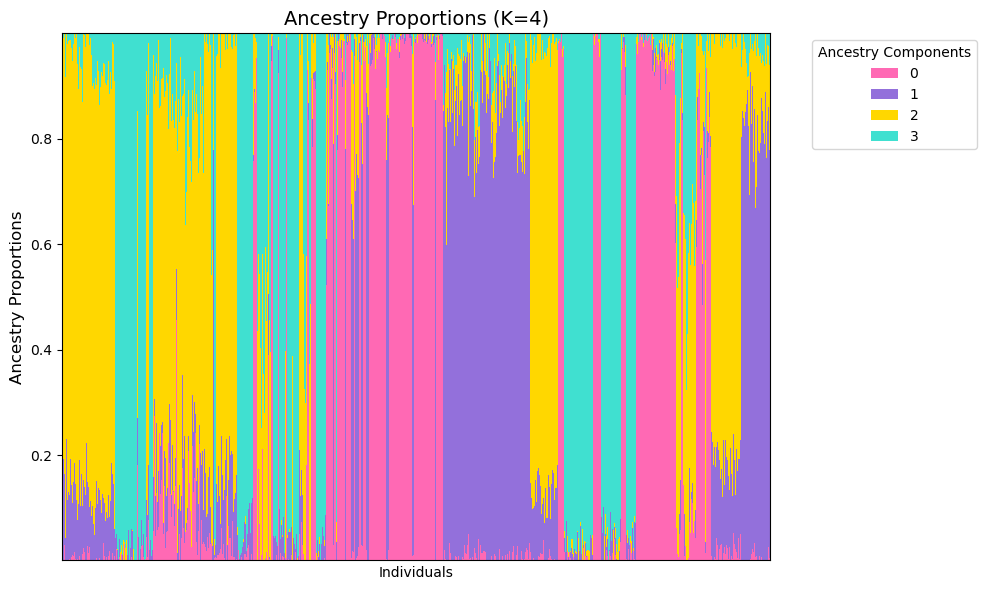

In [1]:
# admixing
import os
import subprocess

# File paths
plink_file_prefix = "~/biol6150/ProjectSubmissions/Group8/Project10/1000Genomes.Phase3.Chr2.QCFinal" 
admixture_executable = "~/biol6150/SharedEnvironment/biol6150/bin/admixture" 

# ADMIXTURE parameters
K = 4  #ancestral pops to infer, starting with 4 

#run admixture
command = f"{admixture_executable} {plink_file_prefix}.bed {K}"
subprocess.run(command, shell=True)

import pandas as pd
import matplotlib.pyplot as plt

# Load ancestry proportions
q_file = f"{plink_file_prefix}.{K}.Q"
ancestry_data = pd.read_csv(q_file, sep=" ", header=None)

# Plot ancestry proportions
fig, ax = plt.subplots(figsize=(10, 6))
ancestry_data.plot(kind="bar", stacked=True, ax=ax, width=1, color=["#FF69B4", "#9370DB", "#FFD700", "#40E0D0"])

# Adjust aesthetics
ax.set_xlabel("Individuals")  # Remove x-axis label
ax.set_xticks([])  # Remove individual identifiers from the x-axis
ax.set_ylabel("Ancestry Proportions", fontsize=12)
ax.set_title(f"Ancestry Proportions (K={K})", fontsize=14)
ax.legend(title="Ancestry Components", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

plt.show()

# 1.2

In [1]:
!cp ~/biol6150/ProjectSubmissions/Group8/Project9/scratch/1000Genomes.Phase3.Chr2.QCFinal.log ~/biol6150/ProjectSubmissions/Group8/Project10/

In [ ]:
# determining the best value of k out of 2-10
#k with the lowest CV error is the best

In [1]:
import os
import subprocess

# Cross-validation for optimal K
cv_errors = []

for k in range(2, 10):
    admixture_executable = os.path.expanduser("~/biol6150/SharedEnvironment/biol6150/bin/admixture")
    input_file = os.path.expanduser("~/biol6150/ProjectSubmissions/Group8/Project10/1000Genomes.Phase3.Chr2.QCFinal.bed")
    plink_file_prefix = os.path.expanduser("~/biol6150/ProjectSubmissions/Group8/Project10/1000Genomes.Phase3.Chr2.QCFinal")
    
    command = f"{admixture_executable} --cv {input_file} {k}"
    subprocess.run(command, shell=True)
    
    # Extract cross-validation error from the log file (or output file)
    log_file = os.path.expanduser("~/biol6150/ProjectSubmissions/Group8/Project10/1000Genomes.Phase3.Chr2.QCFinal.log")
    with open(log_file, 'r') as f:
        last_line = f.readlines()[-1]
        # This assumes the last line contains the CV error
        # You might need to adjust this parsing based on the exact format of your output.
        cv_error = float(last_line.strip().split()[-1])  # Extracting the error
        cv_errors.append((k, cv_error))
        print(f"K={k}: CV Error={cv_error}")

# Find the optimal K based on the lowest CV error
optimal_k = min(cv_errors, key=lambda x: x[1])[0]
print(f"Optimal K: {optimal_k}")

****                   ADMIXTURE Version 1.3.0                  ****
****                    Copyright 2008-2015                     ****
****           David Alexander, Suyash Shringarpure,            ****
****                John  Novembre, Ken Lange                   ****
****                                                            ****
****                 Please cite our paper!                     ****
****   Information at www.genetics.ucla.edu/software/admixture  ****

Cross-validation will be performed.  Folds=5.
Random seed: 43
Point estimation method: Block relaxation algorithm
Convergence acceleration algorithm: QuasiNewton, 3 secant conditions
Point estimation will terminate when objective function delta < 0.0001
Estimation of standard errors disabled; will compute point estimates only.
Size of G: 2504x17106
Performing five EM steps to prime main algorithm
1 (EM) 	Elapsed: 1.946	Loglikelihood: -5.2476e+07	(delta): 2.08493e+07
2 (EM) 	Elapsed: 1.949	Loglikelihood: -5.1349

16 (QN/Block) 	Elapsed: 11.389	Loglikelihood: -4.74224e+07	(delta): 32.791
17 (QN/Block) 	Elapsed: 9.864	Loglikelihood: -4.74224e+07	(delta): 10.263
18 (QN/Block) 	Elapsed: 9.733	Loglikelihood: -4.74224e+07	(delta): 12.4107
19 (QN/Block) 	Elapsed: 9.883	Loglikelihood: -4.74224e+07	(delta): 5.60288
20 (QN/Block) 	Elapsed: 9.882	Loglikelihood: -4.74224e+07	(delta): 2.67156
21 (QN/Block) 	Elapsed: 9.733	Loglikelihood: -4.74224e+07	(delta): 1.49054
22 (QN/Block) 	Elapsed: 9.73	Loglikelihood: -4.74224e+07	(delta): 0.537867
23 (QN/Block) 	Elapsed: 9.855	Loglikelihood: -4.74224e+07	(delta): 0.179604
24 (QN/Block) 	Elapsed: 9.848	Loglikelihood: -4.74224e+07	(delta): 0.0908402
25 (QN/Block) 	Elapsed: 9.847	Loglikelihood: -4.74224e+07	(delta): 0.148396
26 (QN/Block) 	Elapsed: 9.882	Loglikelihood: -4.74224e+07	(delta): 0.0599205
27 (QN/Block) 	Elapsed: 9.881	Loglikelihood: -4.74224e+07	(delta): 0.0340323
28 (QN/Block) 	Elapsed: 9.874	Loglikelihood: -4.74224e+07	(delta): 0.0107246
29 (QN/Block) 	E

26 (QN/Block) 	Elapsed: 15.527	Loglikelihood: -4.71973e+07	(delta): 154.007
27 (QN/Block) 	Elapsed: 15.537	Loglikelihood: -4.7197e+07	(delta): 293.493
28 (QN/Block) 	Elapsed: 15.527	Loglikelihood: -4.71967e+07	(delta): 212.531
29 (QN/Block) 	Elapsed: 15.526	Loglikelihood: -4.71966e+07	(delta): 189.459
30 (QN/Block) 	Elapsed: 15.528	Loglikelihood: -4.71964e+07	(delta): 114.053
31 (QN/Block) 	Elapsed: 15.526	Loglikelihood: -4.7196e+07	(delta): 431.001
32 (QN/Block) 	Elapsed: 15.524	Loglikelihood: -4.71957e+07	(delta): 317.017
33 (QN/Block) 	Elapsed: 15.526	Loglikelihood: -4.71954e+07	(delta): 283.98
34 (QN/Block) 	Elapsed: 15.53	Loglikelihood: -4.71952e+07	(delta): 222.661
35 (QN/Block) 	Elapsed: 15.53	Loglikelihood: -4.71947e+07	(delta): 494.271
36 (QN/Block) 	Elapsed: 15.525	Loglikelihood: -4.71944e+07	(delta): 331.576
37 (QN/Block) 	Elapsed: 16.165	Loglikelihood: -4.71939e+07	(delta): 476.213
38 (QN/Block) 	Elapsed: 15.526	Loglikelihood: -4.71936e+07	(delta): 305.277
39 (QN/Block) 	El

Initial loglikelihood: -5.10513e+07
Starting main algorithm
1 (QN/Block) 	Elapsed: 17.718	Loglikelihood: -4.75901e+07	(delta): 3.46125e+06
2 (QN/Block) 	Elapsed: 17.723	Loglikelihood: -4.73222e+07	(delta): 267897
3 (QN/Block) 	Elapsed: 19.778	Loglikelihood: -4.72274e+07	(delta): 94774.9
4 (QN/Block) 	Elapsed: 21.147	Loglikelihood: -4.71742e+07	(delta): 53152.6
5 (QN/Block) 	Elapsed: 21.147	Loglikelihood: -4.71681e+07	(delta): 6148.68
6 (QN/Block) 	Elapsed: 19.087	Loglikelihood: -4.71644e+07	(delta): 3660.85
7 (QN/Block) 	Elapsed: 19.088	Loglikelihood: -4.71631e+07	(delta): 1306.69
8 (QN/Block) 	Elapsed: 19.781	Loglikelihood: -4.71621e+07	(delta): 1050.22
9 (QN/Block) 	Elapsed: 19.096	Loglikelihood: -4.71615e+07	(delta): 551.788
10 (QN/Block) 	Elapsed: 19.097	Loglikelihood: -4.7161e+07	(delta): 555.271
11 (QN/Block) 	Elapsed: 19.094	Loglikelihood: -4.71606e+07	(delta): 387.669
12 (QN/Block) 	Elapsed: 19.782	Loglikelihood: -4.71602e+07	(delta): 338.598
13 (QN/Block) 	Elapsed: 19.087	Logl

16 (QN/Block) 	Elapsed: 24.546	Loglikelihood: -4.71231e+07	(delta): 590.889
17 (QN/Block) 	Elapsed: 22.98	Loglikelihood: -4.71228e+07	(delta): 296.199
18 (QN/Block) 	Elapsed: 23.085	Loglikelihood: -4.71224e+07	(delta): 430.417
19 (QN/Block) 	Elapsed: 23.708	Loglikelihood: -4.71221e+07	(delta): 292.809
20 (QN/Block) 	Elapsed: 24.434	Loglikelihood: -4.71219e+07	(delta): 150.357
21 (QN/Block) 	Elapsed: 23.011	Loglikelihood: -4.71218e+07	(delta): 131.529
22 (QN/Block) 	Elapsed: 23.013	Loglikelihood: -4.71216e+07	(delta): 221.02
23 (QN/Block) 	Elapsed: 23.01	Loglikelihood: -4.71215e+07	(delta): 127.356
24 (QN/Block) 	Elapsed: 23.705	Loglikelihood: -4.71214e+07	(delta): 112.574
25 (QN/Block) 	Elapsed: 23.078	Loglikelihood: -4.71213e+07	(delta): 95.5359
26 (QN/Block) 	Elapsed: 23.08	Loglikelihood: -4.71211e+07	(delta): 133.945
27 (QN/Block) 	Elapsed: 23.082	Loglikelihood: -4.7121e+07	(delta): 74.3739
28 (QN/Block) 	Elapsed: 24.439	Loglikelihood: -4.7121e+07	(delta): 45.1617
29 (QN/Block) 	Ela

10 (QN/Block) 	Elapsed: 28.2	Loglikelihood: -4.71063e+07	(delta): 1648.03
11 (QN/Block) 	Elapsed: 28.249	Loglikelihood: -4.71048e+07	(delta): 1492.99
12 (QN/Block) 	Elapsed: 29.846	Loglikelihood: -4.71042e+07	(delta): 639.75
13 (QN/Block) 	Elapsed: 28.229	Loglikelihood: -4.71032e+07	(delta): 1029.47
14 (QN/Block) 	Elapsed: 28.12	Loglikelihood: -4.71024e+07	(delta): 809.213
15 (QN/Block) 	Elapsed: 28.127	Loglikelihood: -4.71017e+07	(delta): 689.5
16 (QN/Block) 	Elapsed: 27.412	Loglikelihood: -4.71012e+07	(delta): 517.818
17 (QN/Block) 	Elapsed: 28.032	Loglikelihood: -4.71003e+07	(delta): 875.666
18 (QN/Block) 	Elapsed: 28.808	Loglikelihood: -4.70996e+07	(delta): 721.748
19 (QN/Block) 	Elapsed: 28.988	Loglikelihood: -4.70992e+07	(delta): 393.625
20 (QN/Block) 	Elapsed: 27.392	Loglikelihood: -4.70989e+07	(delta): 261.075
21 (QN/Block) 	Elapsed: 27.306	Loglikelihood: -4.70981e+07	(delta): 771.507
22 (QN/Block) 	Elapsed: 27.396	Loglikelihood: -4.70978e+07	(delta): 379.775
23 (QN/Block) 	Ela

In [ ]:
# the optimal K is 2

# 1.3

In [ ]:
# Report final ancestries using a visualization method of your choice.
# doing this for a k value of 2
# file 1000Genomes.Phase3.Chr2.QCFinal.2.Q

****                   ADMIXTURE Version 1.3.0                  ****
****                    Copyright 2008-2015                     ****
****           David Alexander, Suyash Shringarpure,            ****
****                John  Novembre, Ken Lange                   ****
****                                                            ****
****                 Please cite our paper!                     ****
****   Information at www.genetics.ucla.edu/software/admixture  ****

Random seed: 43
Point estimation method: Block relaxation algorithm
Convergence acceleration algorithm: QuasiNewton, 3 secant conditions
Point estimation will terminate when objective function delta < 0.0001
Estimation of standard errors disabled; will compute point estimates only.
Size of G: 2504x17106
Performing five EM steps to prime main algorithm
1 (EM) 	Elapsed: 1.959	Loglikelihood: -5.2476e+07	(delta): 2.08493e+07
2 (EM) 	Elapsed: 1.961	Loglikelihood: -5.13494e+07	(delta): 1.12659e+06
3 (EM) 	Elapsed: 1.

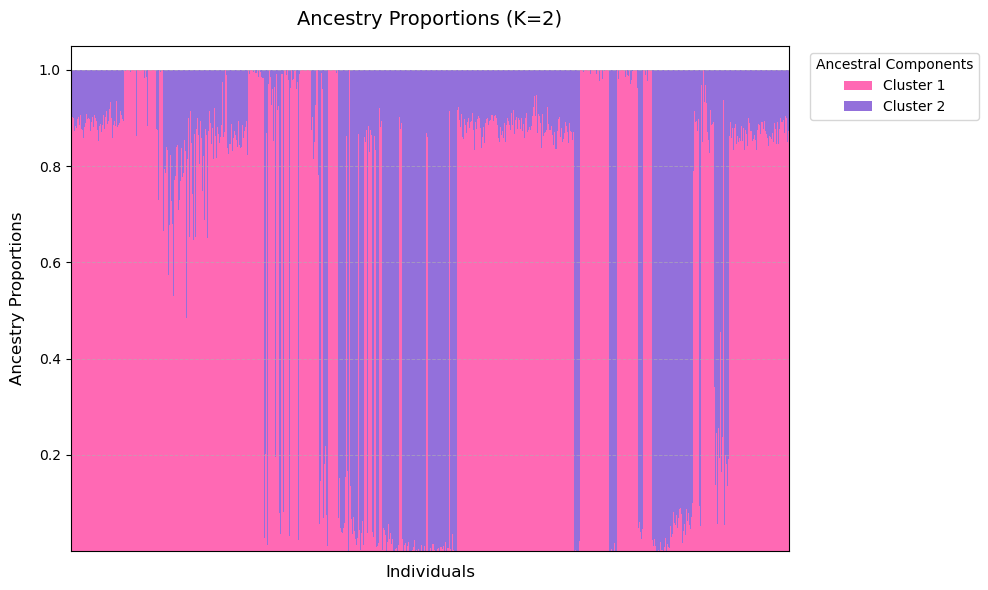

In [2]:
import os
import subprocess
import pandas as pd
import matplotlib.pyplot as plt

# File paths
plink_file_prefix = "~/biol6150/ProjectSubmissions/Group8/Project10/1000Genomes.Phase3.Chr2.QCFinal" 
admixture_executable = "~/biol6150/SharedEnvironment/biol6150/bin/admixture" 

# ADMIXTURE parameters
K = 2  # Number of ancestral populations to infer

# Run ADMIXTURE
command = f"{admixture_executable} {plink_file_prefix}.bed {K}"
subprocess.run(command, shell=True)

# Load ancestry proportions
q_file = f"{plink_file_prefix}.{K}.Q"
ancestry_data = pd.read_csv(q_file, sep=" ", header=None)

# Plot ancestry proportions
fig, ax = plt.subplots(figsize=(10, 6))  # Optimal size for better readability
colors = ["#FF69B4", "#9370DB"]  # Define custom colors for the bars

ancestry_data.plot(
    kind="bar", 
    stacked=True, 
    ax=ax, 
    width=1,  # Ensure bars are properly spaced
    color=colors
)

# Customize axes
ax.set_xlabel("Individuals", fontsize=12, labelpad=10)
ax.set_ylabel("Ancestry Proportions", fontsize=12, labelpad=10)
ax.set_title(f"Ancestry Proportions (K={K})", fontsize=14, pad=15)
ax.tick_params(axis="x", labelsize=10, length=0)  # Hide x-axis ticks to avoid clutter
ax.tick_params(axis="y", labelsize=10)

# Add horizontal grid lines for better readability
ax.grid(axis="y", linestyle="--", linewidth=0.7, alpha=0.6)

# Remove x-axis labels if individual identifiers are unnecessary
ax.set_xticks([])  # Hide x-axis labels

# Add legend
ax.legend(
    labels=[f"Cluster {i+1}" for i in range(K)],  # Auto-generate cluster labels
    title="Ancestral Components",
    bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=10
)

# Tight layout to avoid clipping
plt.tight_layout()

plt.show()

# 1.4

In [ ]:
# Report average ancestry values for each of the 26 population groups

In [1]:
# copy the metadata file
!cp ~/biol6150/ProjectSubmissions/Group8/Project9/integrated_call_samples_v3.20130502.ALL.panel ~/biol6150/ProjectSubmissions/Group8/Project10/

In [1]:
# assuming the q matrix is in the same order as the metadata file, which it should be since it was not reordered
# step 1) load and match the Q file to the metadata file
import pandas as pd

# Load Q-matrix and metadata
q_matrix = pd.read_csv("~/biol6150/ProjectSubmissions/Group8/Project10/1000Genomes.Phase3.Chr2.QCFinal.2.Q", header=None, delim_whitespace=True)
metadata = pd.read_csv("~/biol6150/ProjectSubmissions/Group8/Project10/integrated_call_samples_v3.20130502.ALL.panel", sep="\t")

# Ensure alignment
assert q_matrix.shape[0] == metadata.shape[0], "Mismatch between Q-matrix and metadata rows"

# Combine data
q_matrix.columns = ['Ancestry1', 'Ancestry2']
combined_data = pd.concat([metadata, q_matrix], axis=1)
print(combined_data.head())
print("step 1 done!")

# step 2) fix the columns
print(combined_data.columns)
# rename column names to match
combined_data.rename(columns={
    "sample": "Sample",
    "pop": "Population",
    "super_pop": "Super Population",
    "gender": "Gender"
}, inplace=True)
print("step 2 done!")

# step 3) group by population to find avg ancestry
avg_ancestry = combined_data.groupby("Population")[["Ancestry1", "Ancestry2"]].mean()
avg_ancestry.to_csv("~/biol6150/ProjectSubmissions/Group8/Project10/average_ancestry_by_population.csv")
print("step 3 done!")
print("Average ancestries:")
print(avg_ancestry)

    sample  pop super_pop  gender  Unnamed: 4  Unnamed: 5  Ancestry1  \
0  HG00096  GBR       EUR    male         NaN         NaN   0.905297   
1  HG00097  GBR       EUR  female         NaN         NaN   0.850585   
2  HG00099  GBR       EUR  female         NaN         NaN   0.892766   
3  HG00100  GBR       EUR  female         NaN         NaN   0.879868   
4  HG00101  GBR       EUR    male         NaN         NaN   0.894217   

   Ancestry2  
0   0.094703  
1   0.149415  
2   0.107234  
3   0.120132  
4   0.105783  
step 1 done!
Index(['sample', 'pop', 'super_pop', 'gender', 'Unnamed: 4', 'Unnamed: 5',
       'Ancestry1', 'Ancestry2'],
      dtype='object')
step 2 done!
step 3 done!
Average ancestries:
            Ancestry1  Ancestry2
Population                      
ACB          0.103705   0.896295
ASW          0.219935   0.780065
BEB          0.894250   0.105750
CDX          0.998873   0.001127
CEU          0.877443   0.122557
CHB          0.998051   0.001949
CHS          0.998077  